
# Titianic -Machine Learning in disaster
### **Creator: Qurat Ul Ain**

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc)

### Tasks
*   Data Collection 
*   Data Wrangling
*   Data Visualization 
*   Feature Selection 



## Dataset info:
Variable	Definition	Key
survival 	Survival 	0 = No, 1 = Yes
pclass 	Ticket class 	1 = 1st, 2 = 2nd, 3 = 3rd
sex 	Sex 	
Age 	Age in years 	
sibsp 	# of siblings / spouses aboard the Titanic 	
parch 	# of parents / children aboard the Titanic 	
ticket 	Ticket number 	
fare 	Passenger fare 	
cabin 	Cabin number 	
embarked 	Port of Embarkation 	C = Cherbourg, Q = Queenstown, S = Southampton

Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

The file should have exactly 2 columns:

    PassengerId (sorted in any order)
    Survived (contains your binary predictions: 1 for survived, 0 for deceased)


Train.csv will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.

The test.csv dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s your job to predict these outcomes.

Using the patterns you find in the train.csv data, predict whether the other 418 passengers on board (found in test.csv) survived.

Dataset link: https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales


## Importing required Libraries

In [203]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import pandas as pd
from scipy.stats.contingency import association
from sklearn.impute import SimpleImputer 
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Data Collection

In [204]:
train_data =pd.read_csv("J:/datasets/Kaggle/train.csv")
test_data =pd.read_csv("J:/datasets/Kaggle/test.csv")
sub_file= ("J:/datasets/Kaggle/gender_submission.csv")
print("Data has been loaded successfully")
train_data.head()


Data has been loaded successfully


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [205]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Data Cleaning and Preprocessing

In [206]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [207]:
train_data['PassengerId'].value_counts()

1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64

In [208]:
train_data.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Categorise Numeric and Categorical Data

In [209]:
data_numerics = train_data.select_dtypes(include=np.number)
data_cat = set(train_data.columns) - set(data_numerics)
print("Numeric Columns:\n",list(data_numerics))
print("Categorical Columns:\n",data_cat)

Numeric Columns:
 ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Categorical Columns:
 {'Embarked', 'Cabin', 'Name', 'Ticket', 'Sex'}


### Finding missing values

In [210]:
print('Missing value: ------------- ')
missing_val= train_data.isnull().sum()
print(missing_val)

Missing value: ------------- 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [211]:
# Fill NaN values in 'Age' column with the mean
mean_age = train_data['Age'].mean()
train_data['Age'].fillna(mean_age, inplace=True)

# Fill NaN values in 'Cabin' column with a custom value (e.g., 'Unknown')
train_data['Cabin'].fillna('Unknown', inplace=True)

# Fill NaN values in 'Embarked' column with a custom value (e.g., 'None')
train_data['Embarked'].fillna('None', inplace=True)

# Print the updated DataFrame
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S


    "Age" missing value replased with Mean Age!
    "Cabin" missing value relaced with 'Unknown'
    "Embarked" missing value replaced with none!

### Finding Duplicates

In [212]:
train_data.duplicated().sum()

0

    No duplicate found!

## Exploratory  Data Analysis

### Summary of Survival, fare. Pclass

In [213]:
# Calculate total Fare
tot_Fare = int(train_data["Fare"].sum())

# Calculate average Survived
avg_Survived = round(train_data["Survived"].mean(), 1)
star_rate = ":star:" * int(round(avg_Survived, 0))

# Calculate average  Fare Percent
avg_Fare_round = round(train_data["Fare"].mean(), 2)

# Unique PClass
unique_class = train_data["Pclass"].nunique()

# Total Survived & dead
is_survived_0 = train_data['Survived'] == 0
is_survived_1 = train_data['Survived'] == 1

# Count the records with survival of 0 or 1
survived_0 = is_survived_0.sum()
survived_1 = is_survived_1.sum()

# Print the results
print("Total Fare: ", tot_Fare)
print("Average Fare: ", avg_Fare_round)
print("Average Survived: ", avg_Survived, star_rate)
print("Total Survived (1): ", survived_1)
print("Total Dead(0): ", survived_0)
print("Unique PClass: ", unique_class)


Total Fare:  28693
Average Fare:  32.2
Average Survived:  0.4 
Total Survived (1):  342
Total Dead(0):  549
Unique PClass:  3


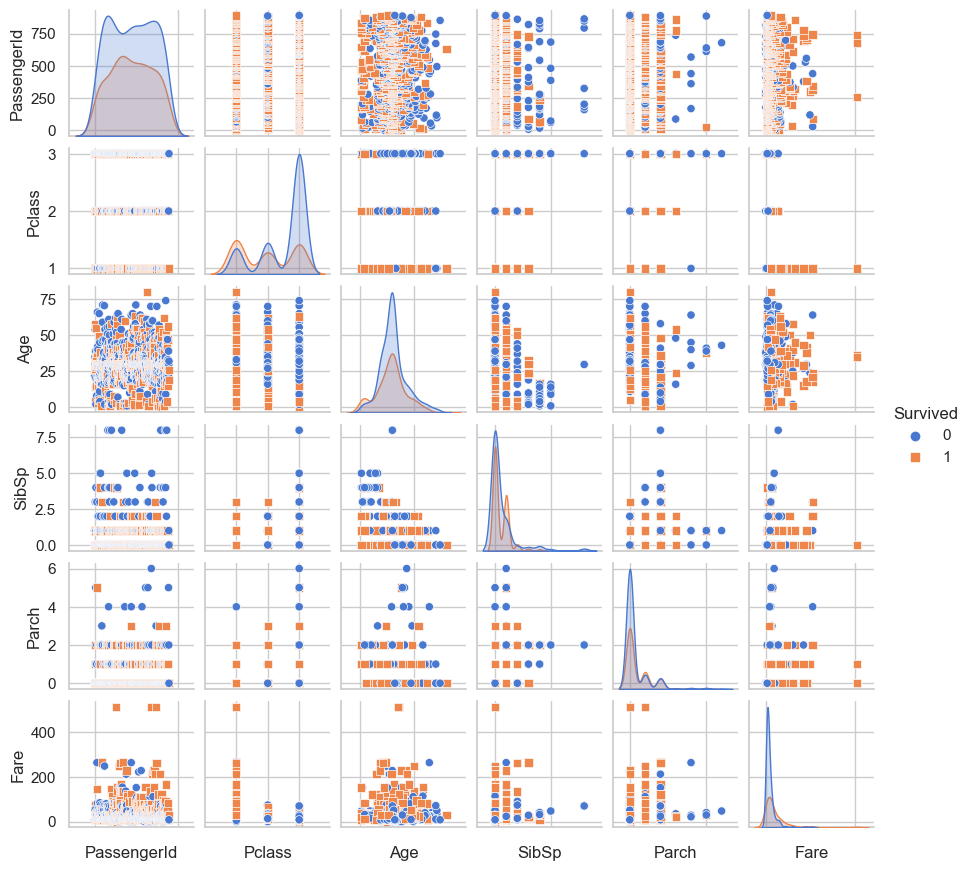

In [244]:
g = sns.pairplot(data=train_data, hue='Survived', palette = 'muted',
                 height=1.5, markers=["o", "s"]  )
g.set(xticklabels=[])

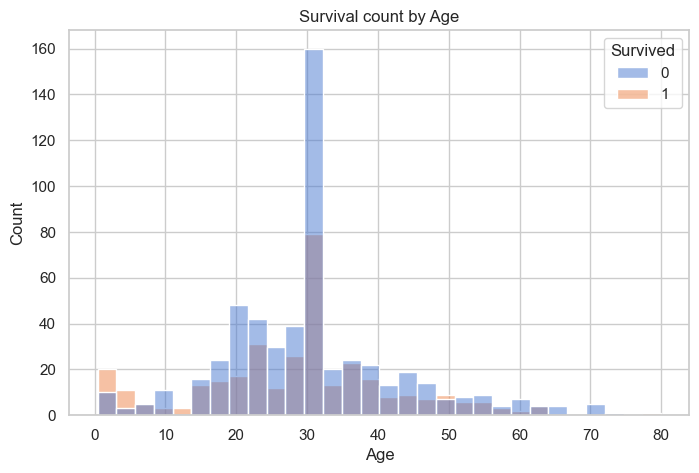

In [215]:
plt.figure(figsize=(8,5))
sns.set_theme(style="whitegrid",palette = 'muted')
s=sns.histplot(data=train_data, x="Age", hue="Survived")
s.set_title('Survival count by Age')
plt.show()

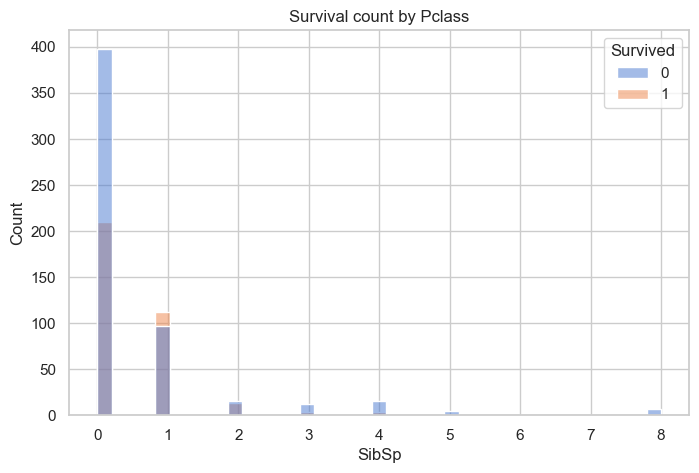

In [216]:
plt.figure(figsize=(8,5))
sns.set_theme(style="whitegrid",palette = 'muted')
s=sns.histplot(data=train_data, x="SibSp", hue="Survived")
s.set_title('Survival count by Pclass')
plt.show()

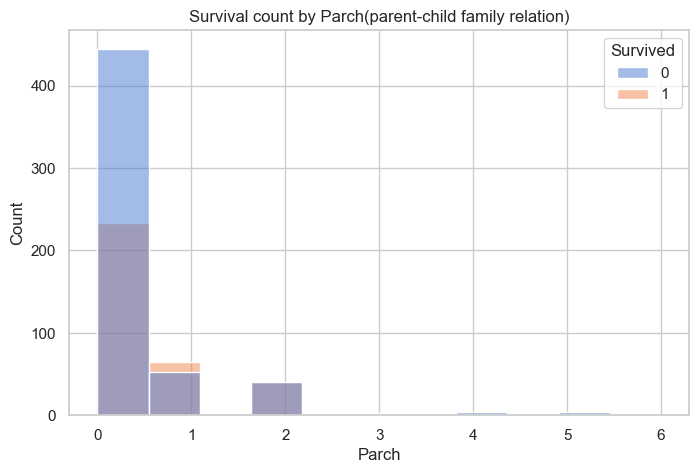

In [217]:
plt.figure(figsize=(8,5))
sns.set_theme(style="whitegrid",palette = 'muted')
s=sns.histplot(data=train_data, x="Parch", hue="Survived")
s.set_title('Survival count by Parch(parent-child family relation)')
plt.show()

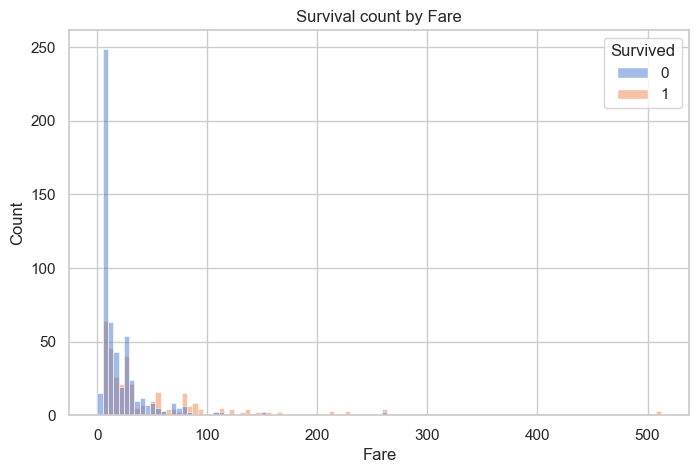

In [219]:
plt.figure(figsize=(8,5))
sns.set_theme(style="whitegrid",palette = 'muted')
s=sns.histplot(data=train_data, x="Fare", hue="Survived")
s.set_title('Survival count by Fare')
plt.show()

### What is a Survival rate by PClass?

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


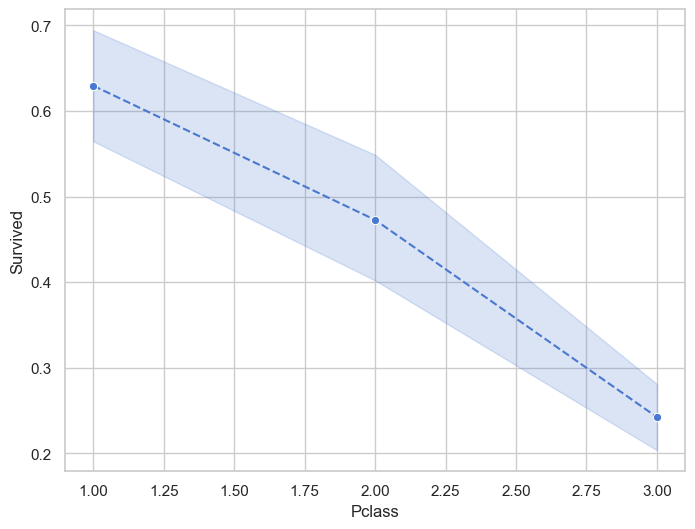

In [220]:
# Calculate survival rate by Pclass
sv_rate = train_data.groupby('Pclass')['Survived'].mean().sort_values(ascending=False)
print(sv_rate)
plt.figure(figsize=(8, 6))
sns.lineplot(x = 'Pclass' , y = 'Survived' , data = train_data, linestyle='--', marker ='o')
plt.show()


    *Pclass 1 has the highest survival rate
    *Pclass 3 has the least survival rate

In [153]:
train_data['Cabin'].unique

<bound method Series.unique of 0      Unknown
1          C85
2      Unknown
3         C123
4      Unknown
        ...   
886    Unknown
887        B42
888    Unknown
889       C148
890    Unknown
Name: Cabin, Length: 891, dtype: object>

### What is Survival Ratio for specific age group?

In [222]:
# Define the age groups
age_groups = {
    'kid': (0, 12),
    'young': (13, 30),
    'adult': (30, 60),
    'old': (61, 150)
}

# Function to categorize age into age groups
def categorize_age(age):
    for group, (start, end) in age_groups.items():
        if start <= age <= end:
            return group
    return 'unknown'

# Apply the categorize_age function to the 'Age' column
train_data['Age_Group'] = train_data['Age'].apply(categorize_age)

# Print the updated DataFrame
print(train_data[['Age', 'Age_Group']])

           Age Age_Group
0    22.000000     young
1    38.000000     adult
2    26.000000     young
3    35.000000     adult
4    35.000000     adult
..         ...       ...
886  27.000000     young
887  19.000000     young
888  29.699118     young
889  26.000000     young
890  32.000000     adult

[891 rows x 2 columns]


In [223]:
unique_cabins = train_data['Embarked'].unique()
print(unique_cabins)

['S' 'C' 'Q' 'None']


In [224]:
unique_cabins = train_data[train_data['Pclass'] == 1]['Cabin'].unique()
print(unique_cabins)

['C85' 'C123' 'E46' 'C103' 'A6' 'C23 C25 C27' 'Unknown' 'B78' 'D33' 'B30'
 'C52' 'B28' 'C83' 'E31' 'A5' 'D10 D12' 'D26' 'C110' 'B58 B60' 'D47' 'B86'
 'C2' 'E33' 'B19' 'A7' 'C49' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93'
 'C78' 'D35' 'C87' 'B77' 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49'
 'C22 C26' 'C106' 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32'
 'B18' 'C124' 'C91' 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98'
 'E44' 'A34' 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30'
 'D20' 'B79' 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16'
 'C101' 'C68' 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26'
 'D48' 'E58' 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'C62 C64' 'E24'
 'C90' 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'D11' 'B3' 'D6' 'B82 B84' 'D17'
 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50' 'B42' 'C148']


In [225]:
unique_cabins_pclass1 = train_data[train_data['Embarked'] == 'S']['Cabin'].unique()
unique_cabins_pclass2 = train_data[train_data['Embarked'] == 'C']['Cabin'].unique()
unique_cabins_pclass3 = train_data[train_data['Embarked'] == 'Q']['Cabin'].unique()
unique_cabins_pclass4 = train_data[train_data['Embarked'] == 'None']['Cabin'].unique()

# Print the unique cabin values for each Pclass
print("Unique Cabins for Embarked S:", unique_cabins_pclass1)
print("Unique Cabins for Embarked C:", unique_cabins_pclass2)
print("Unique Cabins for Embarked Q:", unique_cabins_pclass3)
print("Unique Cabins for Embarked None:", unique_cabins_pclass4)

Unique Cabins for Embarked S: ['Unknown' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'C52' 'C83'
 'F33' 'F G73' 'E31' 'D26' 'C110' 'E101' 'D47' 'F2' 'C2' 'E33' 'B19' 'F4'
 'A32' 'C93' 'D35' 'C87' 'B77' 'E67' 'B94' 'C125' 'C99' 'D7' 'A19'
 'C22 C26' 'C106' 'C7' 'D' 'C124' 'C91' 'T' 'C128' 'B96 B98' 'E10' 'E44'
 'A34' 'C104' 'E38' 'D21' 'E12' 'E63' 'A14' 'C30' 'B79' 'E25' 'D46' 'B73'
 'C95' 'B38' 'B22' 'C101' 'E68' 'D19' 'D50' 'D9' 'A23' 'E58' 'C126' 'B71'
 'B5' 'B20' 'F G63' 'E24' 'E8' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'B3'
 'D6' 'D17' 'A36' 'B102' 'B69' 'D28' 'E17' 'A24' 'B51 B53 B55' 'B42']
Unique Cabins for Embarked C: ['C85' 'Unknown' 'B78' 'D33' 'B30' 'A5' 'D10 D12' 'B58 B60' 'F E69' 'B86'
 'A7' 'C49' 'B4' 'B80' 'A31' 'D36' 'D15' 'C118' 'B49' 'D' 'C65' 'E36'
 'C54' 'B57 B59 B63 B66' 'E34' 'C32' 'B18' 'E40' 'D37' 'B35' 'E50' 'C82'
 'C111' 'C92' 'B37' 'D20' 'B39' 'C86' 'C70' 'A16' 'C68' 'A10' 'B41' 'A20'
 'B50' 'A26' 'D48' 'B51 B53 B55' 'D49' 'C62 C64' 'C90' 'C45' 'B101'
 'B

Count of Age-wise total survivals: 
 young    178
adult    119
kid       40
old        5
Name: Age_Group, dtype: int64


<Axes: xlabel='Age_Group', ylabel='Survived'>

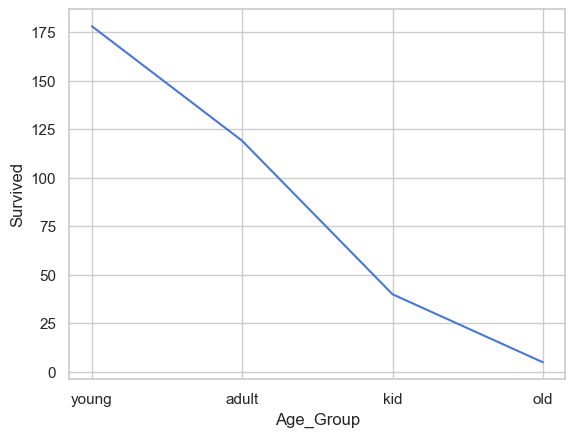

In [226]:
age_wise_survivals = train_data.loc[train_data['Survived'] == 1, 'Age_Group'].value_counts()
# Print the age-wise total survivals
print('Count of Age-wise total survivals: \n', age_wise_survivals)
sns.lineplot(x='Age_Group',y= train_data['Survived'] == 1,data=train_data,errorbar=None,estimator='sum')

### What is the Survival Ratio for Genders having specific Pclass?

Pclass         1         2         3
Sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447


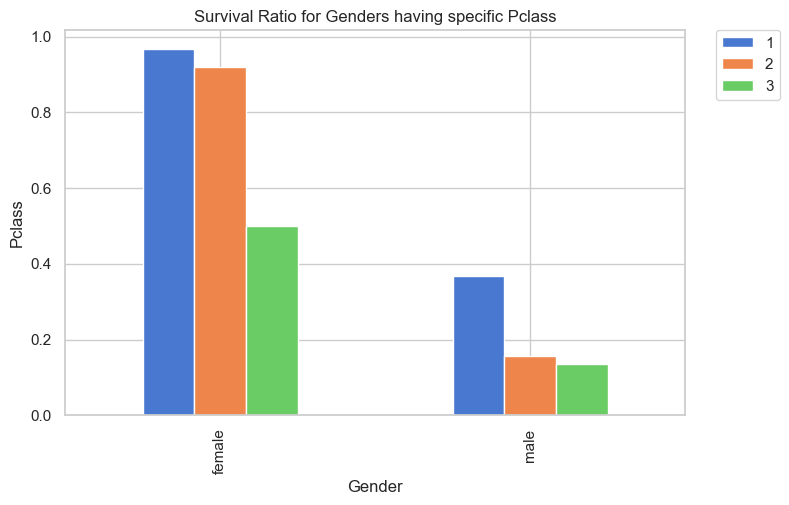

In [227]:
sv_gp = pd.DataFrame(train_data.groupby(["Sex","Pclass"])["Survived"].agg(["sum", "mean"]))
ratio_sv_gp = sv_gp['mean'].unstack()
print (ratio_sv_gp)
ax = ratio_sv_gp.plot(kind='bar', figsize=(8, 5))
sns.set_theme(style="whitegrid", palette = 'muted')
ax.set_xlabel('Gender')
ax.set_ylabel('Pclass')
ax.set_title('Survival Ratio for Genders having specific Pclass')
ax.legend(title='Pclass')
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0.)
plt.show()

    * Overall all Pclass Female members have highest surivival ratio
    * PClass 1 & 2 female survival rate is greater than 90%
    * Pclass 3 have lowest survival rate.
    * Male members of Pclass 2 & 3 have lowest Survival rate

### What is the Survival Ratio between Genders?


Survival Ratio between Genders:
 Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


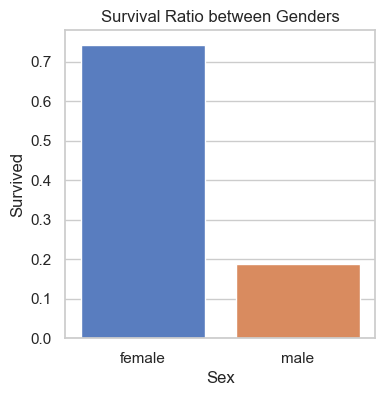

In [228]:
sv_gender_rate = train_data.groupby('Sex')['Survived'].mean().sort_values(ascending=False)
print('\nSurvival Ratio between Genders:\n',sv_gender_rate)

plt.figure(figsize=(4,4))
sns.set_theme(style="whitegrid", palette="muted")
ax = sns.barplot(x=sv_gender_rate.index, y=sv_gender_rate.values)
ax.set(xlabel='Sex', ylabel='Survived', title='Survival Ratio between Genders')
plt.show()

    More Female survived the Titanic Shipwreck than male!

### What is the survival ratio for Family Relation(sibsp)?


Survival Ratio Family relations:
 SibSp
0    210
1    112
2     13
3      4
4      3
5      0
8      0
Name: Survived, dtype: int64


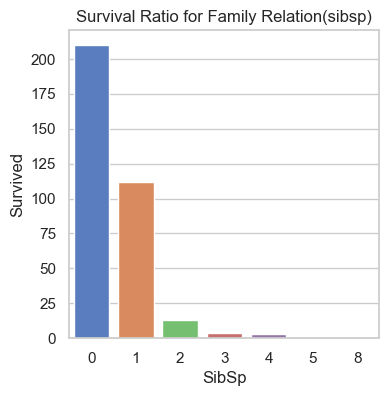

In [229]:
sv_SibSp = train_data.groupby('SibSp')['Survived'].sum().sort_values(ascending=False)
print('\nSurvival Ratio Family relations:\n',sv_SibSp)

plt.figure(figsize=(4,4))
sns.set_theme(style="whitegrid", palette="muted")
ax = sns.barplot(x=sv_SibSp.index, y=sv_SibSp.values)
ax.set(xlabel='SibSp', ylabel='Survived', title='Survival Ratio for Family Relation(sibsp)')
plt.show()

### What is the Survival ratio for Family relation(Parch:parent & child)


Survival Ratio Family relations:
 Parch
0    233
1     65
2     40
3      3
5      1
4      0
6      0
Name: Survived, dtype: int64


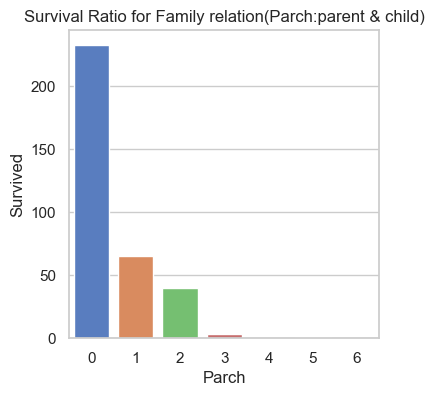

In [230]:
sv_parch= train_data.groupby('Parch')['Survived'].sum().sort_values(ascending=False)
print('\nSurvival Ratio Family relations:\n',sv_parch)

plt.figure(figsize=(4,4))
sns.set_theme(style="whitegrid", palette="muted")
ax = sns.barplot(x=sv_parch.index, y=sv_parch.values)
ax.set(xlabel='Parch', ylabel='Survived', title='Survival Ratio for Family relation(Parch:parent & child)')
plt.show()

### What is the Survival Ratio for embarked Category?


Survival Ratio Embarked:
 Embarked
S       217
C        93
Q        30
None      2
Name: Survived, dtype: int64


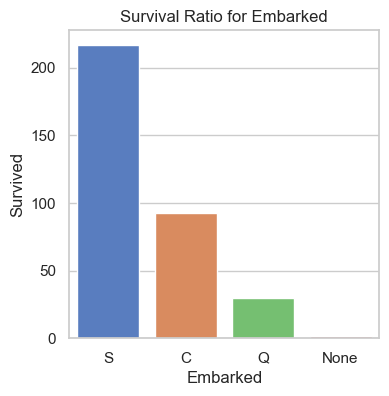

In [231]:
sv_SibSp = train_data.groupby('Embarked')['Survived'].sum().sort_values(ascending=False)
print('\nSurvival Ratio Embarked:\n',sv_SibSp)

plt.figure(figsize=(4,4))
sns.set_theme(style="whitegrid", palette="muted")
ax = sns.barplot(x=sv_SibSp.index, y=sv_SibSp.values)
ax.set(xlabel='Embarked', ylabel='Survived', title='Survival Ratio for Embarked')
plt.show()


### What is the Average Fare by Pclass?



Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


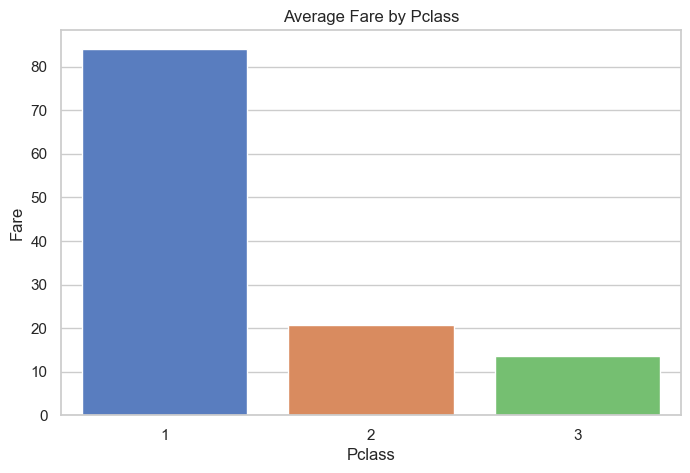

In [232]:
fare_by_pclass= train_data.groupby(train_data['Pclass'])['Fare'].mean()
fare_by_pclass
print(fare_by_pclass)

plt.figure(figsize=(8,5))
sns.set_theme(style="whitegrid", palette="muted")
ax = sns.barplot(x=fare_by_pclass.index, y=fare_by_pclass.values)
ax.set(xlabel='Pclass', ylabel='Fare', title='Average Fare by Pclass')

plt.show()

### What is Distribution of Fare by Pclass?

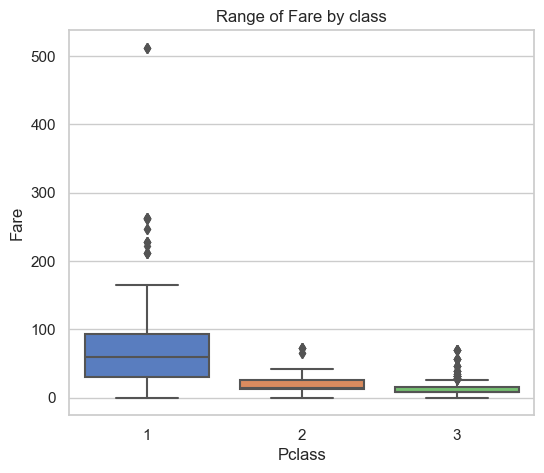

In [234]:
sns.set_theme(style="whitegrid", palette="muted")
plt.figure(figsize=(6, 5))
sns.boxplot(x='Pclass', y='Fare', data=train_data)
plt.title('Range of Fare by class')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.show()


### What is Distribution of Fare by Embarked category and Surivevd?

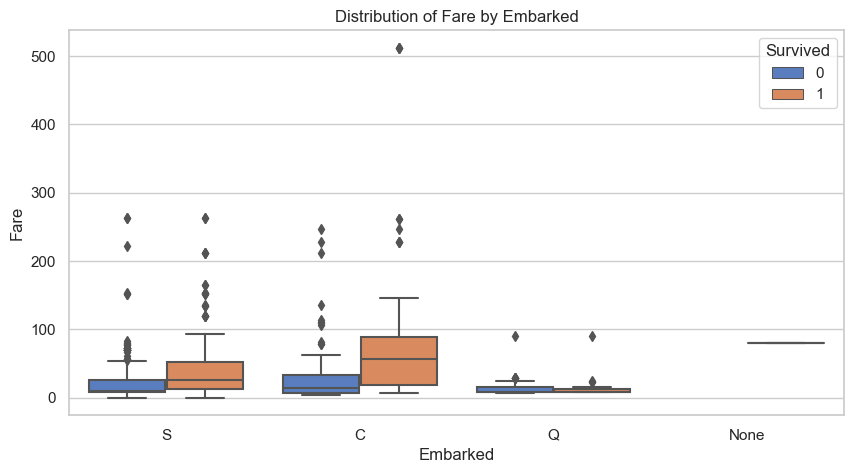

In [235]:
sns.set_theme(style="whitegrid", palette="muted")
plt.figure(figsize=(10, 5))
sns.boxplot(x='Embarked', y='Fare', data=train_data,hue='Survived')
plt.title('Distribution of Fare by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Fare')

plt.show()

### Correlation matrix using Heatmap

C:\Users\mcs\AppData\Local\Temp\ipykernel_13208\1255173612.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(train_data.corr(),annot=True,cmap='crest',linewidths=0.2)


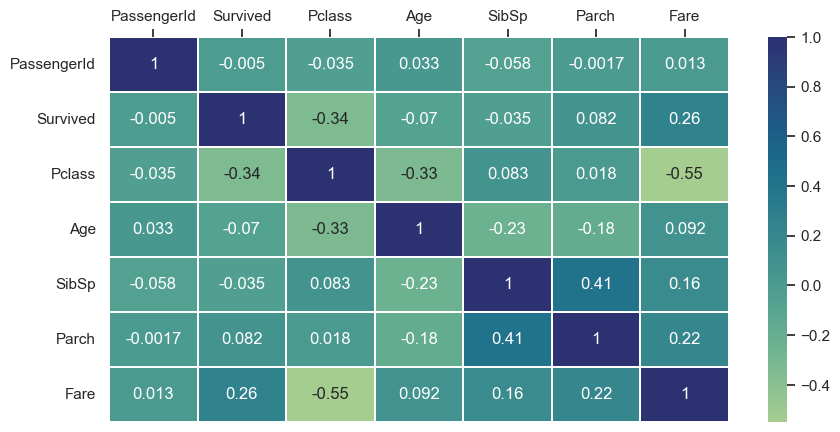

In [239]:
plt.figure(figsize=(10, 5))
ax = sns.heatmap(train_data.corr(),annot=True,cmap='crest',linewidths=0.2)
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()

